In [1]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
from scipy.stats import entropy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Input, Dropout, LSTM
from tensorflow.keras.layers import Bidirectional,BatchNormalization
from tensorflow.keras.layers import PReLU,ReLU,Reshape
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras import callbacks,layers
import random
from sklearn.utils import resample
from tensorflow.keras.utils import plot_model

In [2]:
data = pd.read_csv("Dataset_Combined.csv", low_memory=False)

In [3]:
to_drop = ['ACC_x', 'ACC_y', 'ACC_z']

In [4]:
data.drop(to_drop, axis=1, inplace=True)

In [5]:
y = data.pop('status')
X = data

In [6]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(12, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dense(64, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.3))
#model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, callbacks=[es])

Epoch 1/20
3600/3600 [==============================] - 6s 1ms/step - loss: 0.6690 - accuracy: 0.6023 - val_loss: 0.6630 - val_accuracy: 0.6065
Epoch 2/20
3600/3600 [==============================] - 5s 1ms/step - loss: 0.6550 - accuracy: 0.6162 - val_loss: 0.6465 - val_accuracy: 0.6215
Epoch 3/20
3600/3600 [==============================] - 5s 1ms/step - loss: 0.6340 - accuracy: 0.6383 - val_loss: 0.6315 - val_accuracy: 0.6407
Epoch 4/20
3600/3600 [==============================] - 5s 1ms/step - loss: 0.6126 - accuracy: 0.6575 - val_loss: 0.6054 - val_accuracy: 0.6659
Epoch 5/20
3600/3600 [==============================] - 5s 1ms/step - loss: 0.5868 - accuracy: 0.6806 - val_loss: 0.5756 - val_accuracy: 0.6951
Epoch 6/20
3600/3600 [==============================] - 5s 1ms/step - loss: 0.5595 - accuracy: 0.7021 - val_loss: 0.5579 - val_accuracy: 0.7039
Epoch 7/20
3600/3600 [==============================] - 5s 1ms/step - loss: 0.5325 - accuracy: 0.7222 - val_loss: 0.5259 - val_accuracy:

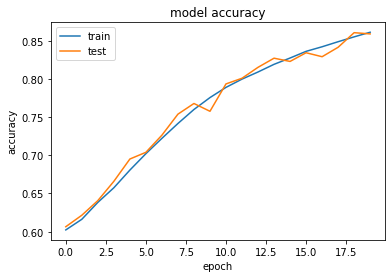

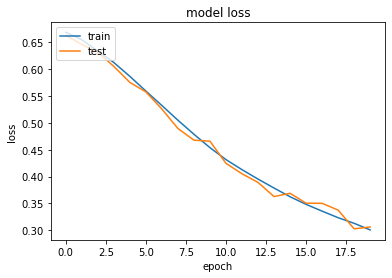

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("acc_cnn_total.png")
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("loss_cnn_total.png")
plt.show()